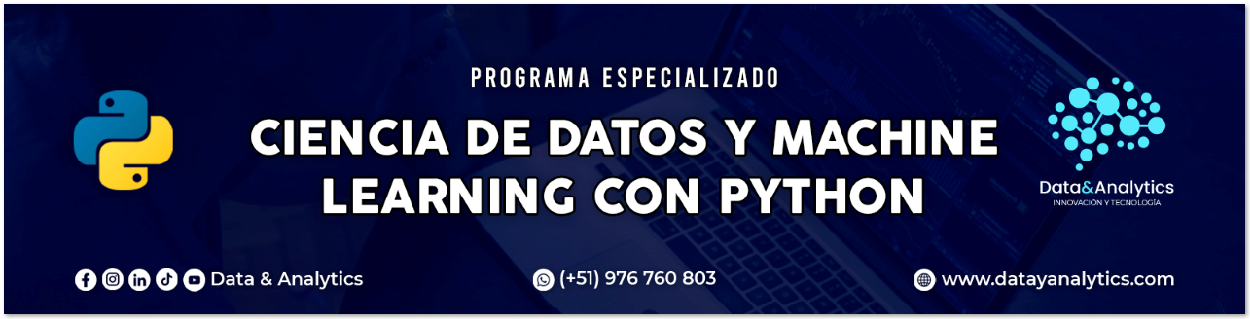

#DATA & ANALYTICS



----------------------------
SESIÓN N°9: Clustering affinity dbscan

Instructor: 

E-mail: cursos@datayanalytics.com

Web: www.datayanalytics.com

En este cuaderno vamos a mostrar como se lleva acabo una segmentación de clientes usando Machine Learning.
Emplearemos tres tecnicas de aprendizaje no supervisado y las compararemos: **KMeans**, **Affinity Propagation** and **DBSCAN**. Habrá más discusión acerca de los algoritmos que usaremos y sus desarrollos.   

El principal objetivo de este cuaderno es cubrir los métodos basicos y tocar algunas técnicas más avanzada.


<a id='Intro'></a>
## 1. Introduction  <a href='#Top' style="text-decoration: none;">^</a><br>

La agrupación en clústeres pertenece a las técnicas de aprendizaje automático no supervisadas.

La tarea principal de la agrupación en clústeres es descubrir grupos "naturales" en un conjunto de datos sin etiquetar. Esta es una tarea importante en el análisis de datos, ya que se utiliza en muchas aplicaciones científicas, de ingeniería y comerciales. La aplicación más conocida de la agrupación en clústeres es la segmentación de clientes (para un marketing eficiente), la segmentación de imágenes y la agrupación de documentos.
Hay muchos algoritmos de agrupamiento que se pueden dividir en dos tipos principales: jerárquicos y particionales.

* Los algoritmos <u> **jerárquicos** </u> dividen de forma recursiva un conjunto de datos en un subconjunto más pequeño hasta que un subconjunto contiene solo un elemento. Esto se puede representar con un dendrograma que parece un árbol. Puede construirse desde las hojas hasta el suelo (enfoque aglomerativo) o desde la raíz hasta las hojas (enfoque divisivo). En la agrupación jerárquica, no es necesario que especifique la cantidad de agrupaciones, pero debe definir una condición de terminación para el proceso de división / fusión. </li>

* <u>**Partitional**</u> Los algoritmos dividen un conjunto de datos en varios subconjuntos (grupos) según un criterio determinado. Para algunos algoritmos, el número de clústeres debe definirse a priori (por ejemplo, K-Means) y para otros no (DBSCAN). Definir el número de clústeres antes de ejecutar un algoritmo a menudo requiere un conocimiento de dominio específico que a menudo es un desafío (o incluso imposible) en muchas aplicaciones. Esto condujo al desarrollo de muchas heurísticas y enfoques simplificados que ayudaron a los analistas sin conocimiento del dominio a elegir el número apropiado de clústeres. </li>

Existe una gran cantidad de algoritmos de agrupamiento y, actualmente, no hay uno que domine a los demás. La elección del mejor depende de la base de datos en sí, del dominio de la aplicación y de los requisitos y expectativas del cliente.
Este cuaderno se centra en tres algoritmos de partición: K-Means, DBSCAN y Affinity Propagation. Todos están implementados en una conocida biblioteca de Python: Scikit-Learn.

<a id='Reading data'></a>
## 2. Leer datos <a href='#Top' style="text-decoration: none;">^</a><br>


In [1]:
# Importamos las librerias básicas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.22.4
seaborn version: 0.12.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mall_data = pd.read_csv('/content/drive/MyDrive/Machine Learning con Python/DATA/Mall_Customers.csv')
print('Hay {} filas y {} columnas en nuestro dataset'.format(mall_data.shape[0],mall_data.shape[1]))

Hay 200 filas y 5 columnas en nuestro dataset


In [ ]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Hay 5 columnas:
* Customer ID - numerica - Número único del cliente, integer
* Gender - categorica - binary (Male/Female)
* Age - numerical - Edad del cliente, integer
* Annual Income (k$) - numerical - integer- Ingreso anual
* Spending Score (1-100) - numerical - integer- Puntuación de gasto

In [5]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


En la estadística descriptica podemos ver que la edad minima que un cliente tiene es de 18 años y la máxima es de 70 años. por otro lado el ingreso mínimo de un cliente es 15K y el máximo es de 137k dólares.

In [6]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Nuestro conjunto de dato no tiene valores nulos. Esto simplifica nuestro análisis y la manipulación de nuestro datos también, aunque es un escenario poco improbable en la vida real donde analizamos, donde pasamos una cantidad de tiempo limpiando nuestro datos antes de analizar su análisis.

<a id='Análisis Exploratorio de datos'></a>
## 3. Análisis Exploratorio de datos<a href='#Top' style="text-decoration: none;">^</a><br>

En esta parte haremos una investigación estadística de nuestra base de datos. Este punto es importante para cualquier análisis que nos ayude poder entender mejor nuestro conjunto de datos. En esta parte la trabajaremos en dos: Distribución y correlación.

<a id='Distributions'></a>
### 3.1 Distribución <a href='#Top' style="text-decoration: none;">^</a><br>

Investiigaremos la distribución de una variable numérica. La data sera estratificada por genero- la única variables categorica.

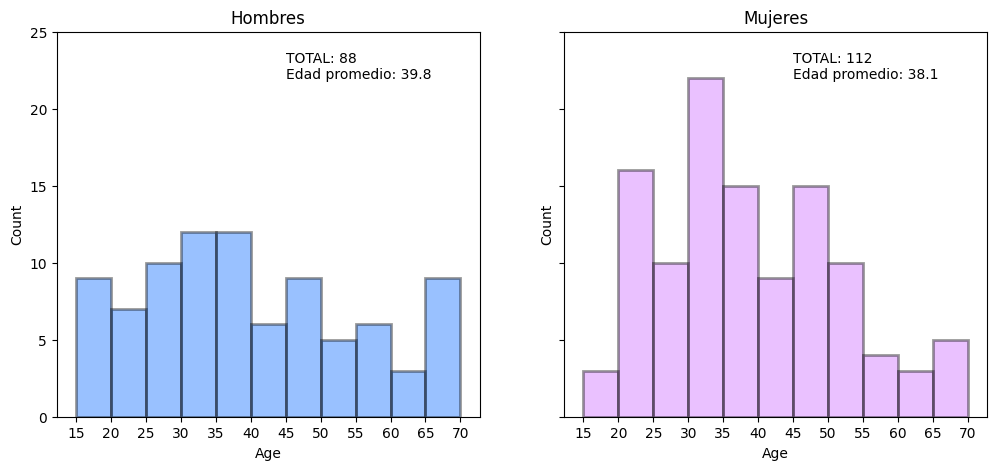

In [7]:
males_age = mall_data[mall_data['Gender']=='Male']['Age'] # Subconjunto de hombre por edad 
females_age = mall_data[mall_data['Gender']=='Female']['Age'] # Subconjunto de mujeres por edad

age_bins = range(15,75,5)

# Histograma de Hombres
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL: {}".format(males_age.count()))
ax1.text(45,22, "Edad promedio: {:.1f}".format(males_age.mean()))

# Histograma de Mujeres
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL: {}".format(females_age.count()))
ax2.text(45,22, "Edad promedio: {:.1f}".format(females_age.mean()))

plt.show();

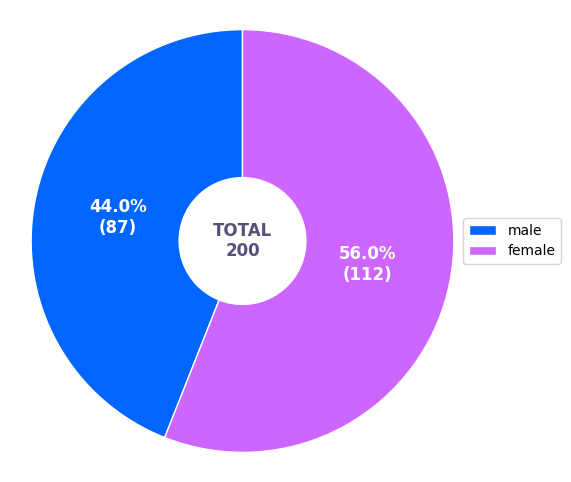

In [8]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

Podemos ver que hay mas mujeres que hombres.

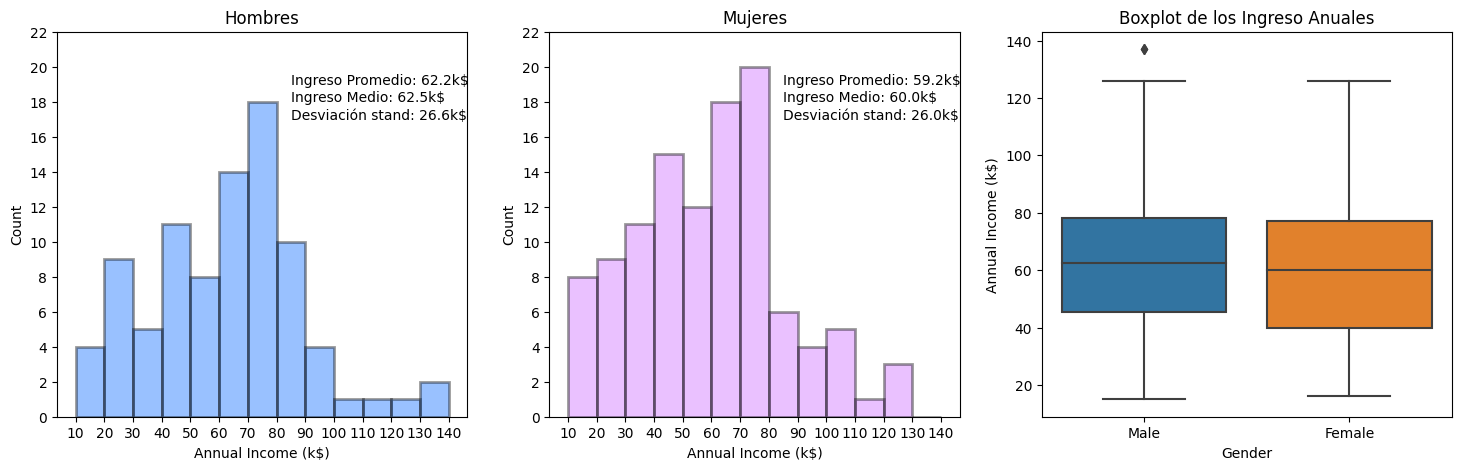

In [9]:
males_income = mall_data[mall_data['Gender']=='Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender']=='Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10,150,10)

# Histograma de Hombres
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(85,19, "Ingreso Promedio: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Ingreso Medio: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Desviación stand: {:.1f}k$".format(males_income.std()))

# Histograma mujeres
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(85,19, "Ingreso Promedio: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Ingreso Medio: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Desviación stand: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot de los Ingreso Anuales')
plt.show();

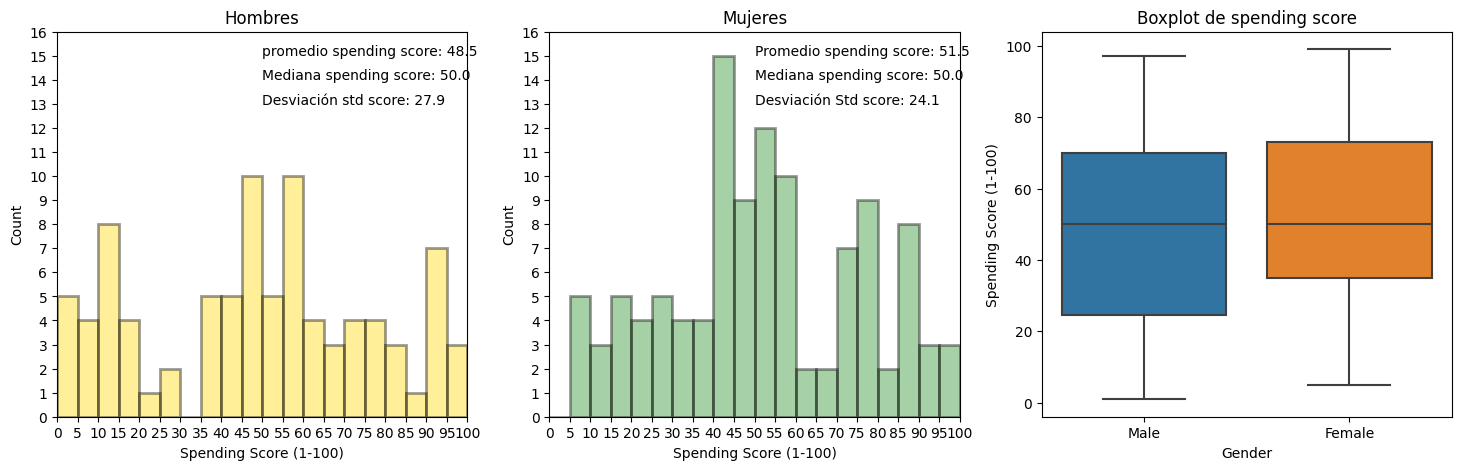

In [10]:
males_spending = mall_data[mall_data['Gender']=='Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Gender']=='Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0,105,5)

# Histograma de los hombres
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='gold', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Hombres')
ax1.set_ylabel('Count')
ax1.text(50,15, "promedio spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Mediana spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Desviación std score: {:.1f}".format(males_spending.std()))

# Histograma de las Mujeres
sns.distplot(females_spending, bins=spending_bins, kde=False, color='forestgreen', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Mujeres')
ax2.set_ylabel('Count')
ax2.text(50,15, "Promedio spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Mediana spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Desviación Std score: {:.1f}".format(females_spending.std()))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot de spending score')
plt.show()

plt.show()

EL promedio de Spending score para las mujeres (51.5) es más alto que el del hombre (48.5). 

In [11]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

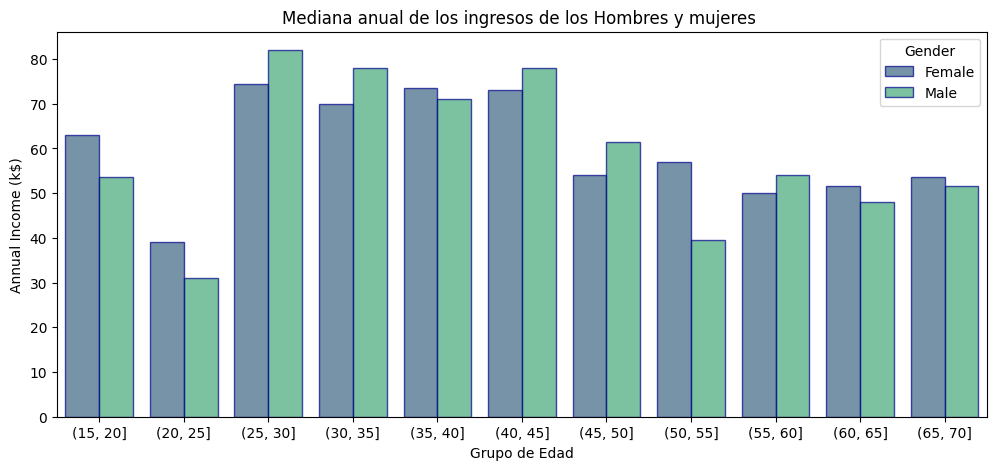

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette="viridis",
            alpha=0.7,edgecolor='darkblue',
            ax=ax)
ax.set_title('Mediana anual de los ingresos de los Hombres y mujeres ')
ax.set_xlabel('Grupo de Edad')
plt.show()

En el gráfico de barra que se muestra arriba, se puede observar que los clientes más adinerado estan entre la edad de 25 a 45 años.

<a id='Correlations'></a>
### 3.2 Correlación<a href='#Top' style="text-decoration: none;">^</a><br>


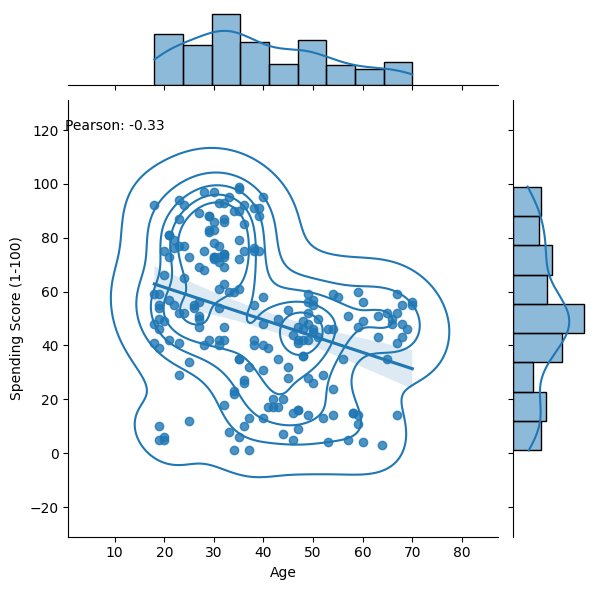

In [15]:
from scipy.stats import pearsonr

# Calculando la correlacio de Pearson
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot(data=mall_data, x='Age',y= 'Spending Score (1-100)', 
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

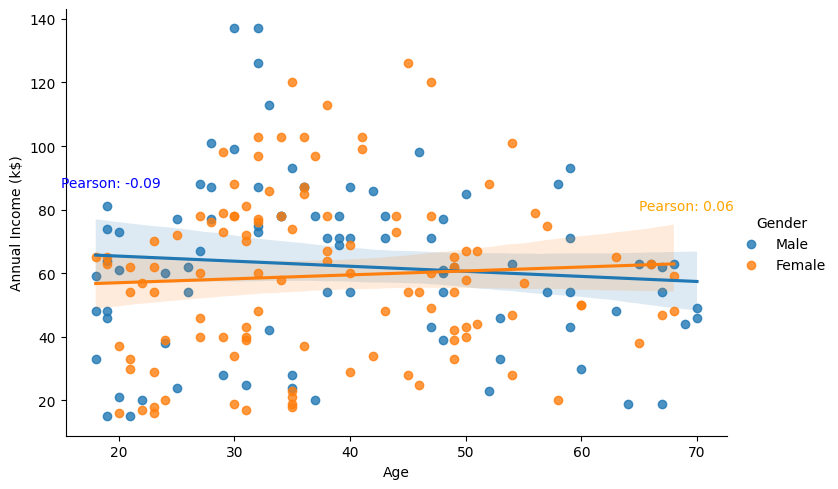

In [16]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(data=mall_data,x='Age',y= 'Annual Income (k$)',  hue='Gender',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

Hay una despreciable correlación entre la edad y el ingreso anual de los clientes para ambos grupos de sexo.

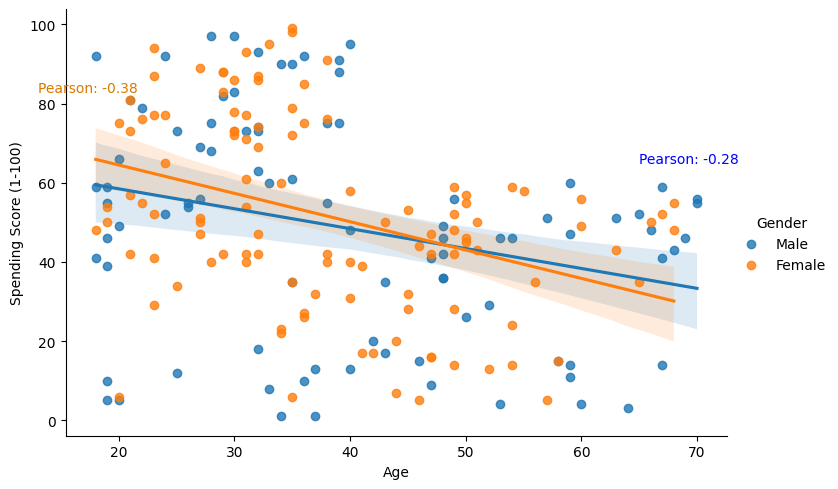

In [17]:
# Calculando la correlación de Pearson
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(data=mall_data, x='Age', y='Spending Score (1-100)',  hue='Gender',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

Hay una debíl correlación negativa (<0.5) entre la edad y spending score para grupo de sexo.

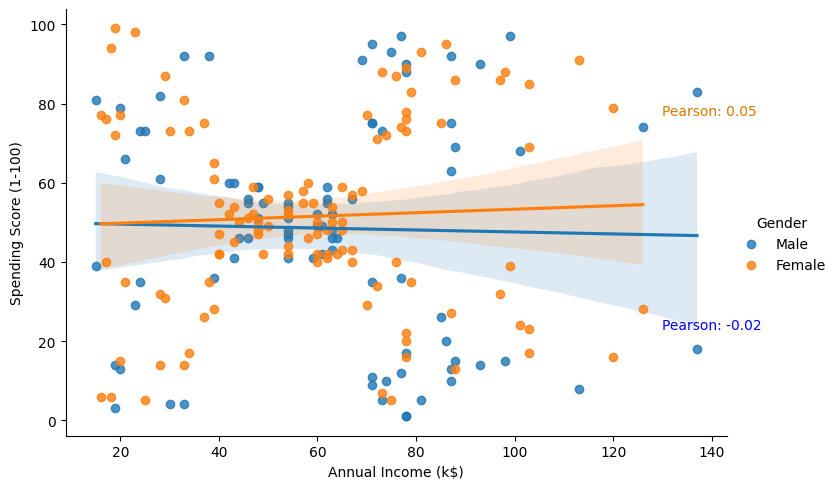

In [19]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot(data=mall_data, x='Annual Income (k$)', y='Spending Score (1-100)',  hue='Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

Hay una despreciable correlación entre el ingreso anual y Spending score de los clientes para ambos sexo de grupo.

<a id='Clustering'></a>
## 4. Clustering<a href='#Top' style="text-decoration: none;">^</a><br>  

Esta sección del cuaderno describiremos y mostraremos cómo utilizar dos algoritmos de agrupamiento:

* Agrupación espacial basada en densidad de aplicaciones con ruido (DBSCAN)
* Propagación por afinidad.

<a id='DBSCAN'></a>
### 4.2 DBSCAN<a href='#Top' style="text-decoration: none;">^</a><br>  

En este cuaderno vamos a describir como DBSCAN (Density-Based Spatial Clustering of Applications with Noise) trabaja y mostrar su implementación para mall customers segmentation.

<a id='DBSCAN description'></a>
### 4.2.1 Descripción<a href='#Top' style="text-decoration: none;">^</a><br>  
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise, es un algoritmo de clustering 

Como su nombre nos indica DBSCAN es un concepto de Región Densas. Supongamos que un cluster natural esta compuesto punto locales densos. Esta definicion requiere de "Región de densidad". Estos dos parámetros se requieren para el algortimo de DBSCAN
 
* Eps, ε  - distance
* MinPts – Minimum number of points within distance Eps  

obsionalmente la distancia métrica la podemos especificar nosotros mismo, por defauld se usa la distancia Euclideana.


Una “dense region” es por tanto creado por un mínimo punto con distancia entre ellos mismos. Punto que están en esta distancia pero no están cerca del número mínimo de otros puntos se tratan como “border points”. Los restantes son ruidos o valores atípicos. 

Ventajas:
* Encuentra el número de cluster en si, basado en Eps y Minpts parámetros.
* Es capaz de diferenciar entre grandes cluster o cluster rodeado de otros cluster 
* Es capaz de encontrar puntos que nos están dentro de algún cluster- decta outliers. 

El mayor inconveniente de DBSCAN: 
* Requiere un alto consumo promedio computacional, esto viene de la necesidad de ejecutar una gran cantidad de neighbourhood para cada punto.
* Es muy pobre para identificar cluster con varias densidades.


<a id='DBSCAN use case'></a>
### 4.2.2 Implemetación DBSCAN - customers segmentation<a href='#Top' style="text-decoration: none;">^</a><br>  


In [20]:
from sklearn.cluster import DBSCAN

Vamos a escoger la mejor combinación de parámetro para el algoritmo. primero creamos una matriz para investigar las combinaciones.

In [21]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
DBSCAN_params

[(8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.25, 6),
 (8.25, 7),
 (8.25, 8),
 (8.25, 9),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.5, 6),
 (8.5, 7),
 (8.5, 8),
 (8.5, 9),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (8.75, 6),
 (8.75, 7),
 (8.75, 8),
 (8.75, 9),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.0, 6),
 (9.0, 7),
 (9.0, 8),
 (9.0, 9),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.25, 6),
 (9.25, 7),
 (9.25, 8),
 (9.25, 9),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.5, 6),
 (9.5, 7),
 (9.5, 8),
 (9.5, 9),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (9.75, 6),
 (9.75, 7),
 (9.75, 8),
 (9.75, 9),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5),
 (10.0, 6),
 (10.0, 7),
 (10.0, 8),
 (10.0, 9),
 (10.25, 3),
 (10.25, 4),
 (10.25, 5),
 (10.25, 6),
 (10.25, 7),
 (10.25, 8),
 (10.25, 9),
 (10.5, 3),
 (10.5, 4),
 (10.5, 5),
 (10.5, 6),
 (10.5, 7),
 (10.5, 8),
 (10.5, 9),
 (10.75, 3),
 (10.75, 4),
 (10.75, 5),
 (10.75, 6),
 (10.75, 7),
 (10.75, 8),
 (10.75, 9),
 (11.0

Visualizamos el número de cluster generado.

In [22]:
from sklearn import metrics

In [23]:
X_numerics=mall_data.drop(["CustomerID", "Gender"], axis=1)

In [24]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(metrics.silhouette_score(X_numerics, DBS_clustering.labels_))

Mostramos los cluster generado por el algoritmo para cada combinación de parámetros.

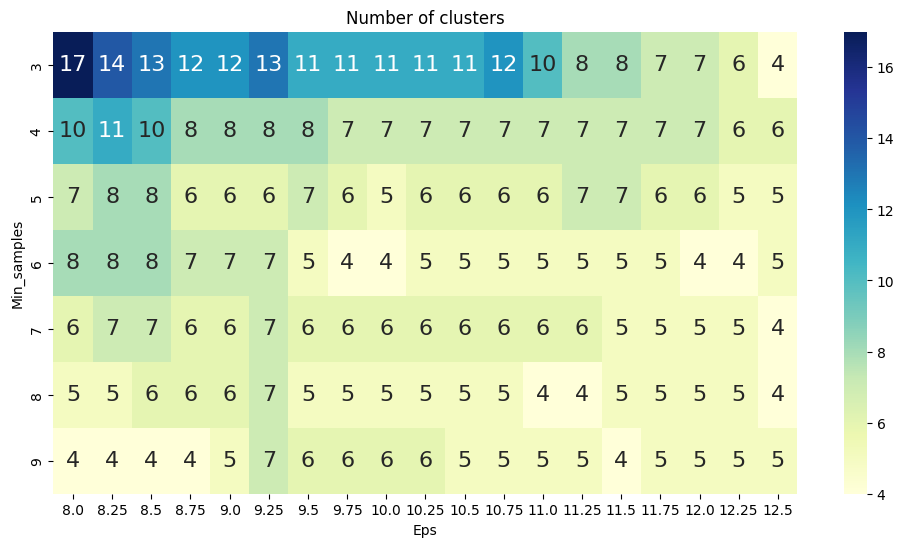

In [25]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

En el heatplot muestra, el número de cluster que varia de 17 a 4.

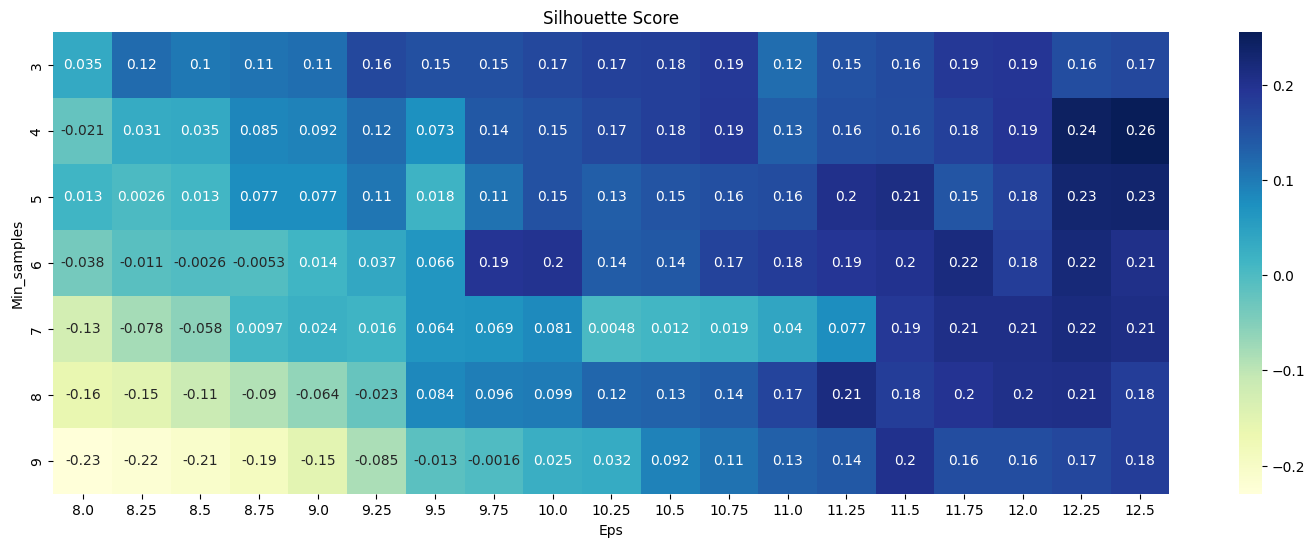

In [26]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Silhouette Score')
plt.show()

Global maximum es de  0.26 para un  eps=12.5 y min_samples=4.

In [27]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

Clusters sizes.

In [28]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN crea 5 clusters más un outliers cluster (-1). El tamaño del clusters 0-4 varia significativamente - algunos solo tiene 4 o 8 observaciones. Hay 18 outliers.

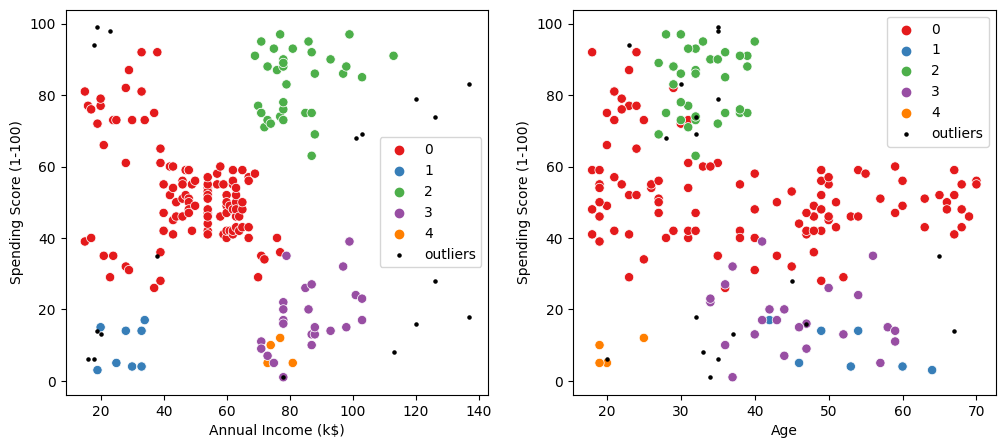

In [30]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                x='Age', y= 'Spending Score (1-100)',   
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show();

El gráfico muestra que hay alguno outliers- Estos puntos no encuentra una distancia y una muestra minima requeridad para reconcer como un cluster.

<a id='AF'></a>
## 4.3 Affinity Propagation<a href='#Top' style="text-decoration: none;">^</a><br>  


**La propagación de afinidad (AP)** es un algoritmo de agrupación basado en el concepto de "paso de mensajes" entre puntos de datos. A diferencia de los algoritmos de agrupamiento como k-medias o k-medoides,la propagación de afinidad no requiere que se determine o estime el número de clústeres antes de ejecutar el algoritmo. Similar a los k-medoides,  la propagación de afinidad encuentra "ejemplares", miembros del conjunto de entrada que son representativos de los clústeres


<a id='AF description'></a>
### 4.3.1 Description<a href='#Top' style="text-decoration: none;">^</a><br>  
Affinity Propagation es un algoritmo de agrupación propuesto por primera vez por Brendan Frey y Delbert Dueck en 2007 (<a href="https://science.sciencemag.org/content/315/5814/972"> "Agrupación mediante el paso de mensajes entre Puntos de datos "</a>). Se basa en el concepto de enviar mensajes entre un par de puntos hasta que convergen. Estos mensajes son una forma de medir qué tan similares son estos dos puntos entre sí y si pueden ser ejemplos entre sí. El algoritmo encuentra un número óptimo de clústeres por sí mismo. Esto también implica un costo de complejidad de tiempo muy alto del orden O (n²T) donde n es el número de muestras y T es el número de iteraciones hasta la convergencia. Sin embargo, una gran ventaja de AP es la falta de sensibilidad a los criterios de inicialización.
    
El usuario debe especificar dos parámetros:
* Preferencia que es un número negativo y controla cuántos ejemplos se utilizan
* Factor de amortiguación que evita oscilaciones numéricas al actualizar mensajes

Al igual que con cualquier otro algoritmo, se están realizando esfuerzos para mejorarlo, por ejemplo:
* P.Ling y su equipo propusieron un algoritmo de <a href="https://www.sciencedirect.com/science/article/pii/S0167865516303403#bib0001"> "Propagación de afinidad de preferencia ajustable (APAP)" </a> que puede producir mejores resultados de agrupamiento debido a la mejora de los cálculos de preferencia de elementos
* H. Wenlong y su equipo propusieron <a href="https://www.sciencedirect.com/science/article/pii/S0020025516300561"> “Transferencia de clústeres basados en la propagación por afinidad” </a> que supera al algoritmo actual en el caso de un conjunto de datos muy pequeño.

### 4.3.2 Algoritmo 

Sea $x_1$ a $x_n$ un conjunto de puntos de datos, sin suposiciones sobre su estructura interna, y sea $s$ una función que cuantifique la similitud entre dos puntos cualesquiera, tal que $s(i, j) > s(i, k)$ iff $x_i$ es más similar a $x_j$ que a $x_k$ . Para este ejemplo, se utilizó la distancia al cuadrado negativa de dos puntos de datos, es decir, para los puntos $x_i$ y $x_k$,  $s(i,k)=-\left\|x_{i}-x_{k}\right\|^{2}$.

La diagonal de $s$ (es decir, $s(i,i)$) es particularmente importante, ya que representa la preferencia de instancia, lo que significa la probabilidad de que una instancia en particular se convierta en un ejemplo. Cuando se establece en el mismo valor para todas las entradas, controla cuántas clases produce el algoritmo. Un valor cercano a la similitud mínima posible produce menos clases, mientras que un valor cercano o mayor que la máxima similitud posible produce muchas clases. Por lo general, se inicializa con la similitud mediana de todos los pares de entradas.

El algoritmo procede alternando entre dos pasos de paso de mensajes, que actualizan dos matrices:

* La matriz de "responsabilidad" $R$ tiene valores $r(i, k)$ que cuantifican qué tan adecuado es $x_k$ para servir como ejemplo para $x_i$, en relación con otros ejemplos candidatos para $x_i$.
* La matriz de "disponibilidad" $A$ contiene valores a $(i, k)$ que representan cuán "apropiado" sería para $x_i$ elegir $x_k$ como su ejemplo, teniendo en cuenta la preferencia de otros puntos por $x_k$ como ejemplo.

Ambas matrices se inicializan a todos los ceros y se pueden ver como tablas de probabilidad logarítmica. A continuación, el algoritmo realiza las siguientes actualizaciones de forma iterativa:

Primero, se envían actualizaciones de responsabilidad: $${\displaystyle r(i,k)\leftarrow s(i,k)-\max _{k'\neq k}\left\{a(i,k')+s(i,k')\right\}}$$

A continuación, la disponibilidad se actualiza por
$${\displaystyle a(i,k)\leftarrow \min \left(0,r(k,k)+\sum _{i'\not \in \{i,k\}}\max(0,r(i',k))\right)} para \ {\displaystyle i\neq k} $$

$${\displaystyle a(k,k)\leftarrow \sum _{i'\neq k}\max(0,r(i',k))}.$$

Las iteraciones se realizan hasta que los límites del clúster permanecen sin cambios durante varias iteraciones o se alcanza algún número predeterminado (de iteraciones). Los ejemplares se extraen de las matrices finales como aquellos cuya "responsabilidad + disponibilidad" para sí mismos es positiva (es decir, $(r(i,i)+a(i,i))>0$).

<a id='AF use case'></a>
### 4.3.3 Use case - customers segmentation<a href='#Top' style="text-decoration: none;">^</a><br> 

In [31]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score

In [ ]:
X_numerics

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [32]:
import numpy as np
preferences = range(-20000,-5000,99) # arbitraty chosen range    -    #does not work on -14700
no_of_clusters = []
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(metrics.silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['Preference','Num. of Clusters','Silhouette Score']).T
af_results = af_results.sort_values(by='Silhouette Score', ascending=False).reset_index(drop=True)
af_results

,Preference,Num. of Clusters,Silhouette Score
0,-11189.0,6.0,0.452357
1,-12080.0,6.0,0.451649
2,-11783.0,6.0,0.451649
3,-13367.0,6.0,0.451491
4,-13664.0,6.0,0.451491
...,...,...,...
147,-5051.0,9.0,0.409475
148,-5447.0,9.0,0.409475
149,-5546.0,9.0,0.409475
150,-11387.0,6.0,0.408018


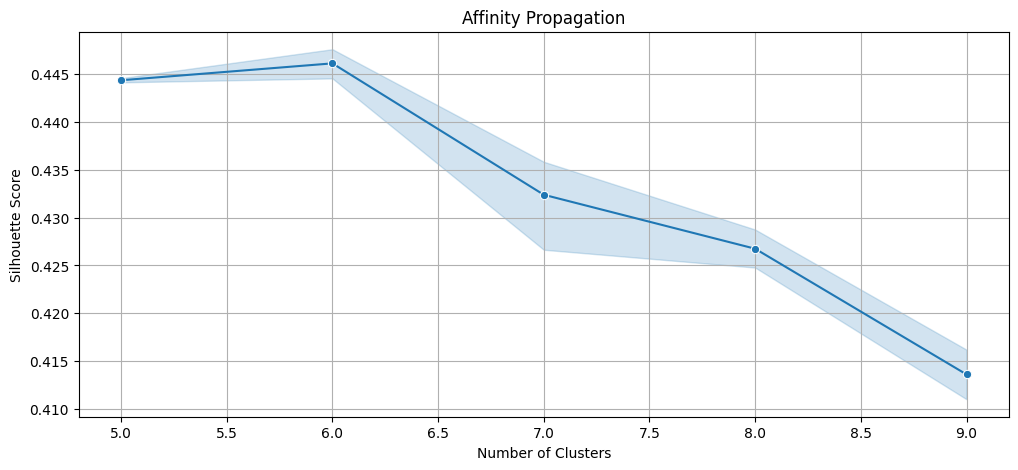

In [34]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=af_results['Num. of Clusters'], y=af_results['Silhouette Score'],  marker='o', ax=ax)
ax.set_title("Affinity Propagation")
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Silhouette Score")
plt.grid()
plt.show()

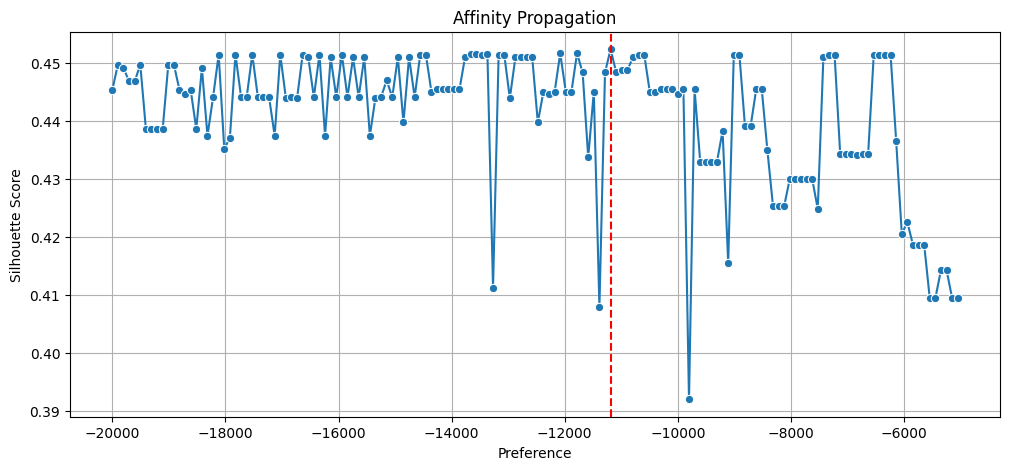

In [35]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=af_results['Preference'], y=af_results['Silhouette Score'],  marker='o', ax=ax)
ax.set_title("Affinity Propagation")
ax.set_xlabel("Preference")
ax.set_ylabel("Silhouette Score")
ax.axvline(-11189, ls="--", c="red")
plt.grid()
plt.show()

In [36]:
AF = AffinityPropagation(preference=-11189).fit(X_numerics)

In [37]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points
AF_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,1
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1
...,...,...,...,...
195,35,120,79,5
196,45,126,28,4
197,32,126,74,5
198,32,137,18,4


In [38]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,38
4,35
5,39


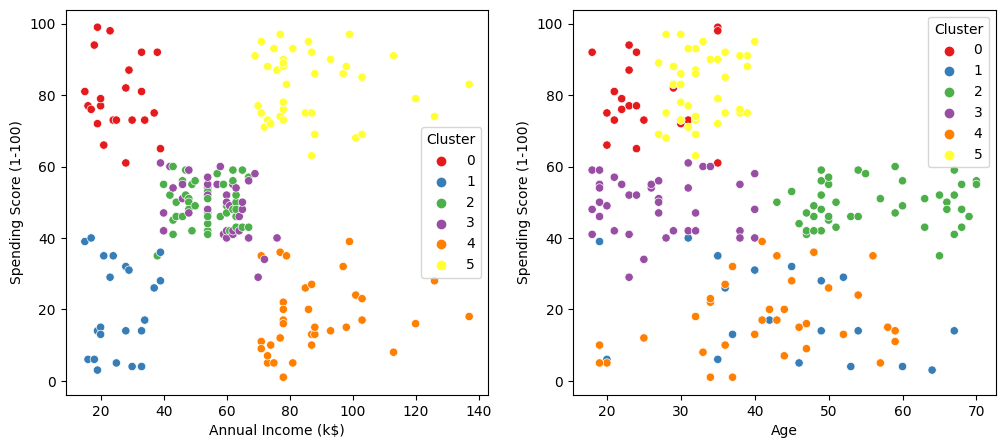

In [39]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(data=AF_clustered,x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(data=AF_clustered,x='Age', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

Los clústeres generados por el algoritmo de propagación de afinidad crearon clústeres de tamaño relativamente uniforme similares a los creados por K-Means.

<a id='Comparison and discussion'></a>
## 5. Comparison and discussion <a href='#Top' style="text-decoration: none;">^</a><br> 

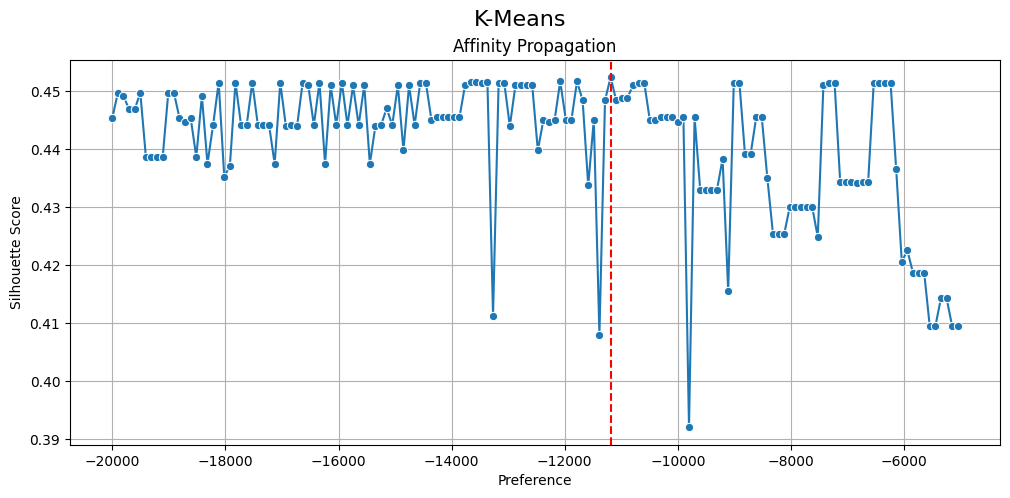

In [45]:
fig2.suptitle('K-Means', fontsize=16)
fig

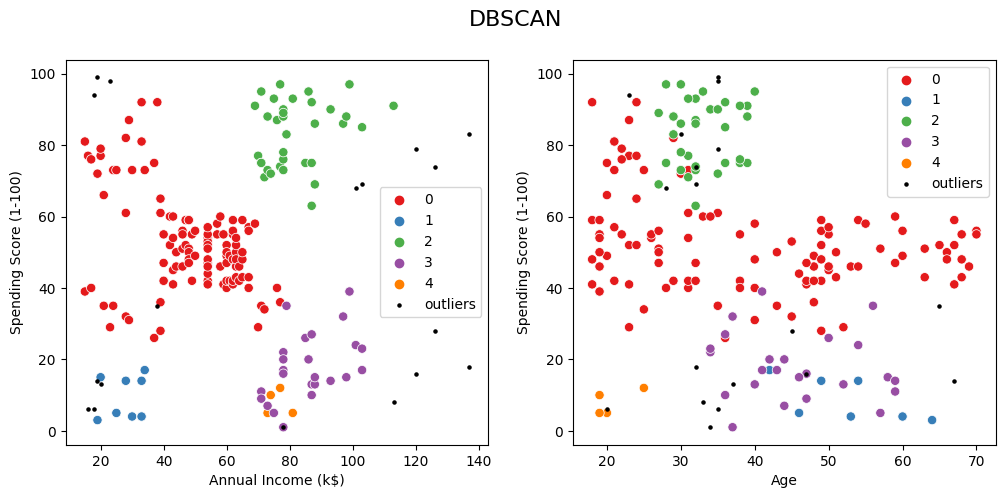

In [43]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

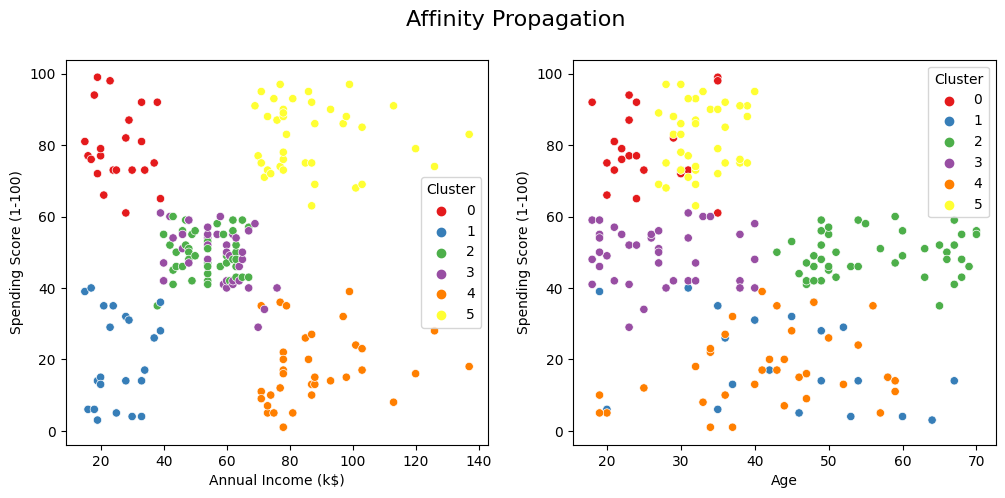

In [46]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

Una tabla a continuación muestra los tamaños de los clústeres creados. Tenga en cuenta que la numeración de grupos es diferente en cada método, p. Ej. El grupo n. ° 0 en K-Means es equivalente al grupo n. ° 2 en DBSCAN y n. ° 2 en Propagación de afinidad.

In [51]:
clusters = pd.concat([DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters

,DBSCAN_size,AF_size
Cluster,,
-1,18.0,NaN
0,112.0,22.0
1,8.0,22.0
2,34.0,44.0
3,24.0,38.0
4,4.0,35.0
5,NaN,39.0


De las comparaciones anteriores, está claro que DBSCAN no pudo generar clústeres razonables. Se debe a sus problemas para reconocer agrupaciones de varias densidades (que están presentes en este caso).

A su vez, los algoritmos K-Means y Affinity Propagation crearon 6 clústeres razonables.

#DATA & ANALYTICS





Web: www.datayanalytics.com